### 2층 신경망을 활용해서 mnist 이미지 데이터 학습    

In [90]:
import sys, os
sys.path.append("C:/Users/KimDongyoung/Desktop/Github/my_git/mygit/DEEPLEARNING/퍼셉트론")

import numpy as np
import mnist as mnist
from ch05.two_layer_net import TwoLayerNet
import matplotlib.pyplot as plt

In [91]:
(x_train, t_train), (x_test, t_test) = mnist.load_mnist(normalize=True, one_hot_label=True) # one_hot_label=True이면 타겟 벡터가 원핫인코딩으로 변환됨

# TwoLayerNet은 은닉 층이 하나인 신경망을 구현한 계층
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)                       # 784=28*28, 50=hidden layer의 노드 수, 10=output layer의 노드 수

print(f"x_train pixel value range: {x_train.min()} to {x_train.max()}")
print(f"x_test pixel value range: {x_test.min()} to {x_test.max()}")

x_train pixel value range: 0.0 to 1.0
x_test pixel value range: 0.0 to 1.0


In [46]:
len(x_test)

10000

In [18]:
iters_num = 12000 # 반복 횟수
train_size = x_train.shape[0] # 데이터 수: 60000
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []
epoch_list = []


# 한 에폭당 반복하는 횟수 
iter_per_epoch = max(train_size / batch_size, 1) # 600번 (60000/100=600)

# 총 에포크 개수 계산
total_epochs = iters_num // iter_per_epoch

print(f"총 에포크 개수: {total_epochs}")

for i in range(iters_num): # 1 에폭당 반복 횟수만큼 반복
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch) # 수치 미분 방식
    grad = network.gradient(x_batch, t_batch) # 오차역전파법 방식
    
    # 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key] # 가중치 매개변수 갱신 방법으로 확률적 경사 하강법(SGD)을 사용함
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 매 에포크마다의 손실 함수 값과 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        epoch_list.append(i // iter_per_epoch + 1)
        print(f"Epoch {i // iter_per_epoch + 1}: Train Accuracy = {train_acc}, Test Accuracy = {test_acc}")

총 에포크 개수: 20.0
Epoch 1.0: Train Accuracy = 0.9992833333333333, Test Accuracy = 0.9726
Epoch 2.0: Train Accuracy = 0.9995166666666667, Test Accuracy = 0.9729
Epoch 3.0: Train Accuracy = 0.9995833333333334, Test Accuracy = 0.9731
Epoch 4.0: Train Accuracy = 0.9990833333333333, Test Accuracy = 0.972
Epoch 5.0: Train Accuracy = 0.99955, Test Accuracy = 0.9733
Epoch 6.0: Train Accuracy = 0.99935, Test Accuracy = 0.9721
Epoch 7.0: Train Accuracy = 0.9997166666666667, Test Accuracy = 0.9733
Epoch 8.0: Train Accuracy = 0.9997, Test Accuracy = 0.9729
Epoch 9.0: Train Accuracy = 0.9997, Test Accuracy = 0.972
Epoch 10.0: Train Accuracy = 0.9996833333333334, Test Accuracy = 0.973
Epoch 11.0: Train Accuracy = 0.9998, Test Accuracy = 0.9739
Epoch 12.0: Train Accuracy = 0.99975, Test Accuracy = 0.9732
Epoch 13.0: Train Accuracy = 0.9997333333333334, Test Accuracy = 0.973
Epoch 14.0: Train Accuracy = 0.9996, Test Accuracy = 0.972
Epoch 15.0: Train Accuracy = 0.99975, Test Accuracy = 0.9731
Epoch 16.0:

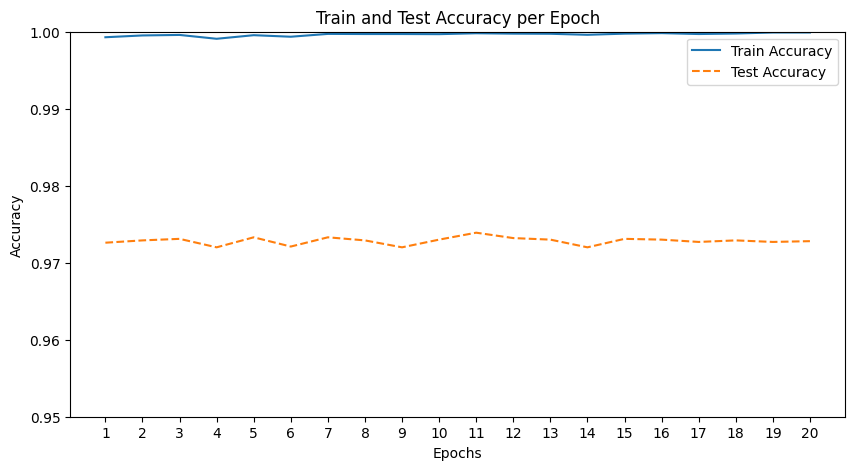

In [105]:
# 그래프 시각화
plt.figure(figsize=(10, 5))
plt.plot(epoch_list, train_acc_list, label='Train Accuracy')
plt.plot(epoch_list, test_acc_list, label='Test Accuracy', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0.95, 1.0)  # y축 범위를 0부터 1 사이로 설정
plt.xticks(epoch_list)
plt.legend()
plt.title('Train and Test Accuracy per Epoch')
plt.show()

In [38]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [92]:
# 랜덤 시드 설정
torch.manual_seed(0)


# Define the neural network
class TwoLayerNet(nn.Module):
    def __init__(self):
        super(TwoLayerNet, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 50) # 첫 번째 은닉층, 은닉층 노드는 128개
        # self.fc2 = nn.Linear(50, )      # 두 번째 은닉층, 은닉층 노드는 64개
        self.fc2 = nn.Linear(50, 10)      # 출력층, 출력층 노드는 10개 (0~9까지의 숫자 분류)
        self.init_weights()
    
    # 가중치 초기화 (정규분포를 따르는 난수로 초기화)    
    def init_weights(self):
        nn.init.normal_(self.fc1.weight, mean=0.0, std=0.01) # self.fc1.weight = 28*28, 50
        nn.init.zeros_(self.fc1.bias)
        nn.init.normal_(self.fc2.weight, mean=0.0, std=0.01) # self.fc2.weight = 50, 10
        nn.init.zeros_(self.fc2.bias)

    def forward(self, x):
        x = x.view(-1, 28 * 28)     # Flatten the input
        x = torch.relu(self.fc1(x)) # 활성화 함수로 ReLU 사용
        # x = torch.relu(self.fc2(x))
        x = self.fc2(x)
        return x

# Load the MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    # transforms.Normalize((0.5,), (0.5,))  
])

train_dataset = datasets.MNIST(root="./data", train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root="./data", train=False, transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=100, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=100, shuffle=False)

In [93]:
# Print the number of data samples
print(f"Number of training samples: {len(train_dataset)}")
print(f"Number of testing samples: {len(test_dataset)}")

# Print the number of iterations per epoch
print(f"Number of iterations per epoch (training): {len(train_loader)}")
print(f"Number of iterations per epoch (testing): {len(test_loader)}")

Number of training samples: 60000
Number of testing samples: 10000
Number of iterations per epoch (training): 600
Number of iterations per epoch (testing): 100


In [94]:
# 픽셀 값 범위 계산
def calculate_min_max(loader):
    min_val = float('inf')
    max_val = float('-inf')

    for images, _ in loader:
        min_val = min(min_val, images.min().item())
        max_val = max(max_val, images.max().item())

    return min_val, max_val

min_val, max_val = calculate_min_max(train_loader)
print(f"Min pixel value: {min_val}")
print(f"Max pixel value: {max_val}")

Min pixel value: 0.0
Max pixel value: 1.0


In [95]:
# Initialize the network, loss function, and optimizer
model = TwoLayerNet()
criterion = nn.CrossEntropyLoss()  # 손실함수로 CrossEntropyLoss 사용
optimizer = optim.SGD(model.parameters(), lr=0.1) # 옵티마이저로 SGD 사용

In [96]:
# Training loop
epochs = 20
train_accuracies = []
test_accuracies = []
losses = []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for images, labels in train_loader:
        optimizer.zero_grad()               # 기울기 초기화
        outputs = model(images)             # 모델의 출력값 계산
        loss = criterion(outputs, labels)
        loss.backward()                     # 역전파. 기울기 계산
        optimizer.step()                    # 가중치 갱신

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)                   # 예측값 계산, 가장 큰 값을 가진 인덱스 반환
        total_train += labels.size(0)                               # 훈련 데이터 개수 계산
        correct_train += (predicted == labels).sum().item()         # 훈련 데이터에서 맞춘 개수 계산

    train_accuracy = 100 * correct_train / total_train              # 훈련 정확도 계산

    model.eval()
    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)               # 예측값 계산, 가장 큰 값을 가진 인덱스 반환
            total_test += labels.size(0)                            # 테스트 데이터 개수 계산
            correct_test += (predicted == labels).sum().item()      # 테스트 데이터에서 맞춘 개수 계산

    test_accuracy = 100 * correct_test / total_test                 # 테스트 정확도 계산

    print(f"Epoch [{epoch + 1}/{epochs}], Loss: {running_loss / len(train_loader):.4f}, Train Accuracy: {train_accuracy:.2f}%, Test Accuracy: {test_accuracy:.2f}%")
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    losses.append(running_loss / len(train_loader))

Epoch [1/20], Loss: 0.7210, Train Accuracy: 80.37%, Test Accuracy: 90.53%
Epoch [2/20], Loss: 0.3048, Train Accuracy: 91.25%, Test Accuracy: 92.57%
Epoch [3/20], Loss: 0.2508, Train Accuracy: 92.81%, Test Accuracy: 93.61%
Epoch [4/20], Loss: 0.2119, Train Accuracy: 94.01%, Test Accuracy: 94.41%
Epoch [5/20], Loss: 0.1820, Train Accuracy: 94.81%, Test Accuracy: 95.03%
Epoch [6/20], Loss: 0.1611, Train Accuracy: 95.42%, Test Accuracy: 95.28%
Epoch [7/20], Loss: 0.1439, Train Accuracy: 95.95%, Test Accuracy: 95.61%
Epoch [8/20], Loss: 0.1308, Train Accuracy: 96.31%, Test Accuracy: 95.96%
Epoch [9/20], Loss: 0.1199, Train Accuracy: 96.61%, Test Accuracy: 95.95%
Epoch [10/20], Loss: 0.1108, Train Accuracy: 96.85%, Test Accuracy: 96.34%
Epoch [11/20], Loss: 0.1026, Train Accuracy: 97.07%, Test Accuracy: 96.53%
Epoch [12/20], Loss: 0.0957, Train Accuracy: 97.28%, Test Accuracy: 96.70%
Epoch [13/20], Loss: 0.0898, Train Accuracy: 97.43%, Test Accuracy: 96.81%
Epoch [14/20], Loss: 0.0845, Train

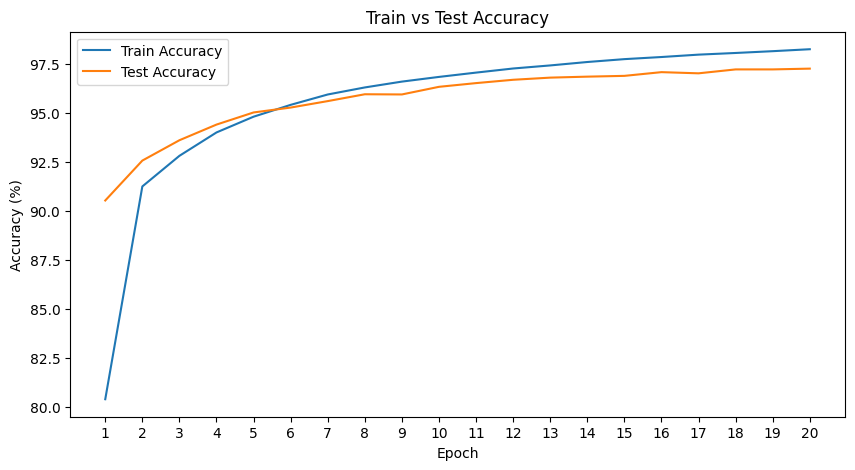

In [99]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, epochs + 1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.xticks(epoch_list)
plt.title('Train vs Test Accuracy')
plt.legend()
plt.show()